In [1]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop

In [2]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
# Quantas imagens eu tenho para treino?
print("Quantidade de imagens para treino:", len(x_treino)) # 60000

# Quantas imagens eu tenho para teste?
print("Quantidade de imagens para teste:", len(x_teste)) # 10000

# Qual o tipo de x_treino?
print("Tipo do x_treino:", type(x_treino))

# Pegando a primeira imagem
primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 representa:", representacao_primeira_imagem)

# Qual o formato da primeira da primeira imagem?
print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo do x_treino: <class 'numpy.ndarray'>
O que a imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

Essa imagem representa: 5


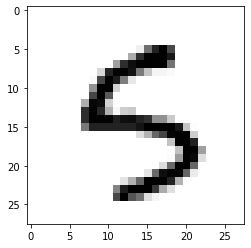

In [4]:
# Exibindo a imagem

import matplotlib.pyplot as plt

"""
for indice in range(60000):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice])
  plt.show()
"""

indice = 15000

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [5]:
# Achatando as matrizes de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # Irá trazer (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [6]:
# Normalização dos dados
# 255 vira 1
# 127 vira 0.5
# 0 vira 0
# E assim por diante

# print(type(x_treino[0]))
# print(x_treino[0])

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(type(x_treino[0][350]))
print(x_treino[0][350])

<class 'numpy.float32'>
0.27450982


In [ ]:
# Visualizando os dados normalizados

print("Dados normalizados:", x_treino[0])

In [12]:
# Camada de saída (output)

valores_unicos = set(y_treino)
quantidade_valores_unicos = len(valores_unicos)

print(valores_unicos)
print(quantidade_valores_unicos)

# Transformação dos valores únicos em variáveis CATEGÓRICAS

# Preço da casa, 150k, 200k, 232k -> Variável numérica
# Tamanho da casa: 100m², 200m² -> Variável numérica
# Tamanho da casa em categorias: casas pequenas, médias e grandes -> Variável categórica

# Representação categórica de um número na rede neural
# Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer com 30 neurônios e função de ativação ReLU
# Na primeira camada, precisamos informar o input shape, que no caso (784,)
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting. No caso, será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer com 20 neurônios e função ativação ReLU
model.add(Dense(20, activation='relu'))

# Mais uma regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
